In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sales_df = pd.read_csv('car_purchasing.csv',encoding='ISO-8859-1')

In [4]:
sales_df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [5]:
sales_df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [7]:
# count of missing values in each columns
sales_df.isna().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

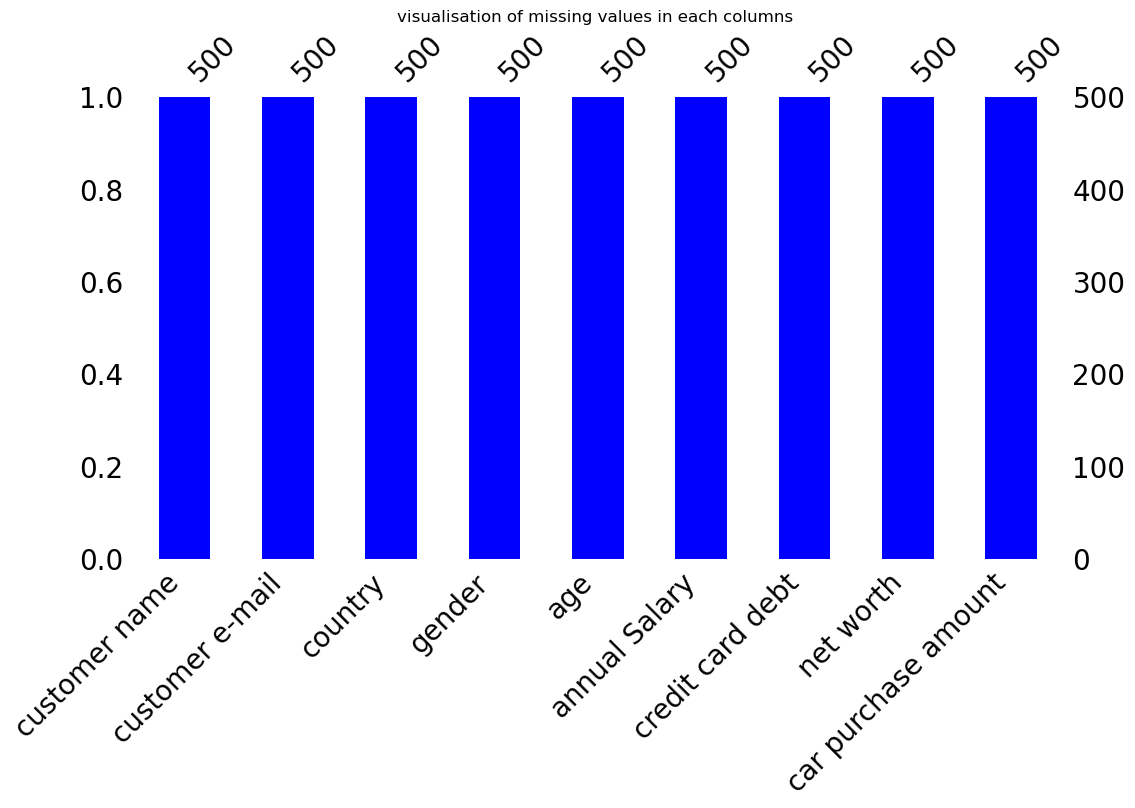

In [9]:
# visualising missing values in each columns 
import missingno as msno
msno.bar(sales_df,color='blue',sort='ascending',fontsize=20,figsize=(12,6))
plt.title('visualisation of missing values in each columns ');

# Exploratory Analysis & Visualization

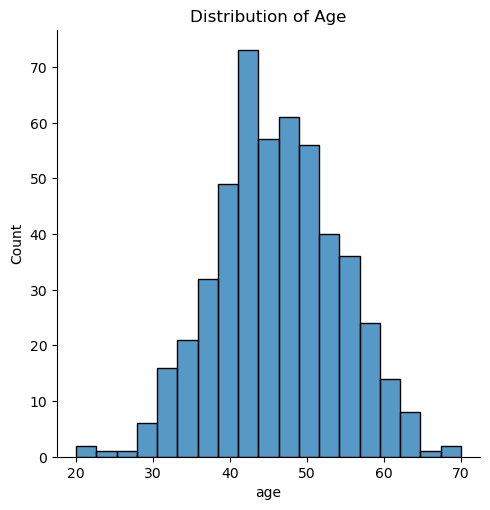

In [17]:
sns.displot(sales_df['age'])
plt.title('Distribution of Age');

In [89]:
sales_df.corr()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
gender,1.000000,-0.064481,-0.036499,0.024193,-0.008395,-0.066408
age,-0.064481,1.000000,0.000130,0.034721,0.020356,0.632865
annual Salary,-0.036499,0.000130,1.000000,0.049599,0.014767,0.617862
credit card debt,0.024193,0.034721,0.049599,1.000000,-0.049378,0.028882
net worth,-0.008395,0.020356,0.014767,-0.049378,1.000000,0.488580
car purchase amount,-0.066408,0.632865,0.617862,0.028882,0.488580,1.000000


<AxesSubplot:>

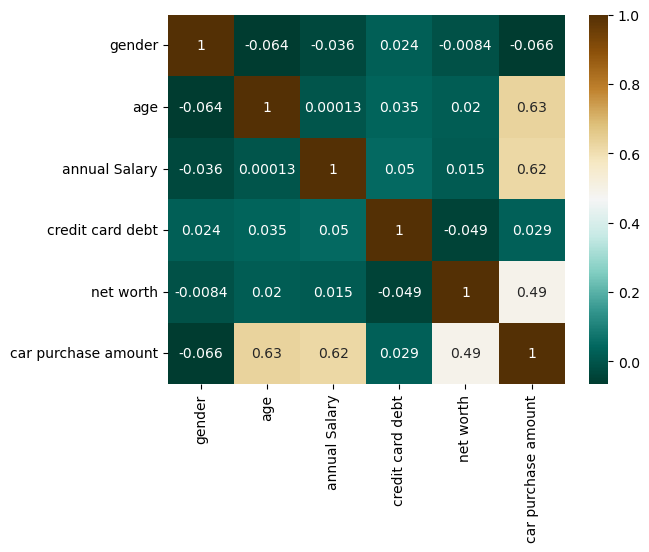

In [91]:
sns.heatmap(sales_df.corr(),cmap='BrBG_r',annot=True)

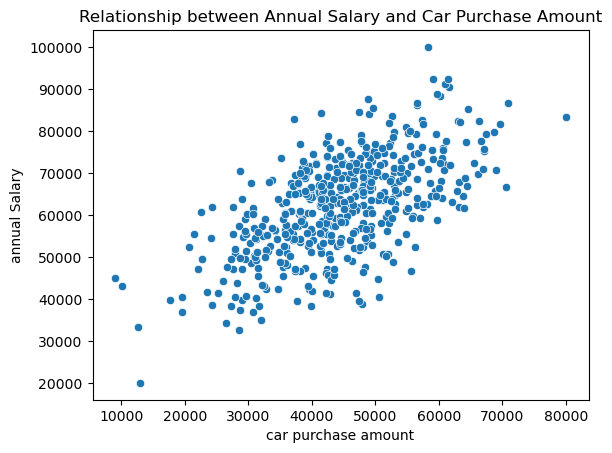

In [95]:
sns.scatterplot(x='car purchase amount',y='annual Salary',data=sales_df)
plt.title('Relationship between Annual Salary and Car Purchase Amount');

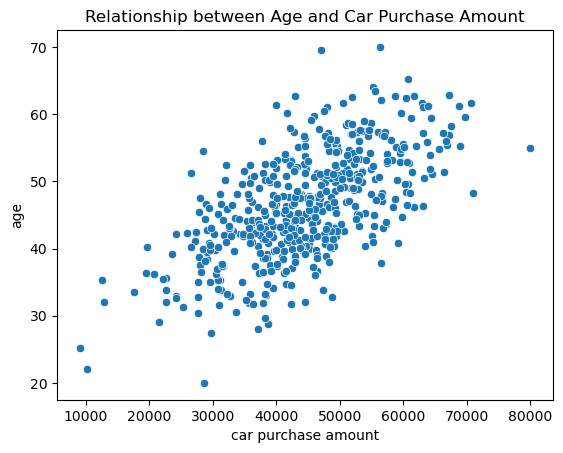

In [99]:
sns.scatterplot(x='car purchase amount',y='age',data=sales_df)
plt.title('Relationship between Age and Car Purchase Amount');

# Training and Testing Model

In [47]:
# 'X' independent variable and 'Y' dependent variaable
X = sales_df.iloc[:].drop(['customer name', 'customer e-mail', 'country', 'gender', 'car purchase amount'],axis=1)
Y = sales_df['car purchase amount']

In [72]:
# split the dataset into 80% training and 20% testing and using cross validation score to compare model
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)


In [68]:
# scale the data making it easier and faster for the model to train on the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [81]:
# create a fuction with seven machine learning models or techniqus
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def machine(X_train, Y_train):
    
#   use Linear Regression
    from sklearn.linear_model import LinearRegression
    lin = LinearRegression()
    lin.fit(X_train,Y_train)
    pred = lin.predict(X_test)
    cross = cross_val_score(lin,X_train, Y_train, cv=5)
    
    
    #   use Random Forest Regression
    from sklearn.ensemble import RandomForestRegressor
    forest = RandomForestRegressor()
    forest.fit(X_train,Y_train)
    pred3 = forest.predict(X_test)
    cross = cross_val_score(forest,X_train, Y_train, cv=5)
    
    
    
    
    #   print the accuracy of each model
    print('[0]MAE Linear Regression Accuracy:', mean_absolute_error(Y_test,pred))
    print('[0]MSE Linear Regression Accuracy:', mean_squared_error(Y_test,pred))
    print('[0]R2 Linear Regression Accuracy:', r2_score(Y_test,pred))
    print('[0]Cross_val Linear Regression Accuracy:', np.mean(cross))
    print()
    #   print the accuracy of each model
    print('[1]MAE Random Forest Regression Accuracy:', mean_absolute_error(Y_test,pred3))
    print('[1]MSE Random Forest Regression Accuracy:', mean_squared_error(Y_test,pred3))
    print('[1]R2 Random Forest Regression Accuracy:', r2_score(Y_test,pred3))
    print('[1]Cross_val Random Forest Regression Accuracy:', np.mean(cross))
    
    
    return lin,forest

In [82]:
# train all models
machine = machine(X_train,Y_train)

[0]MAE Linear Regression Accuracy: 1.233146440431883
[0]MSE Linear Regression Accuracy: 2.491281181727984
[0]R2 Linear Regression Accuracy: 0.9999999793157544
[0]Cross_val Linear Regression Accuracy: 0.9300314750008842

[1]MAE Random Forest Regression Accuracy: 1762.252964445996
[1]MSE Random Forest Regression Accuracy: 6078819.828932857
[1]R2 Random Forest Regression Accuracy: 0.9495296622035209
[1]Cross_val Random Forest Regression Accuracy: 0.9300314750008842
